<a href="https://colab.research.google.com/github/Debankur132/physics-with-python/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

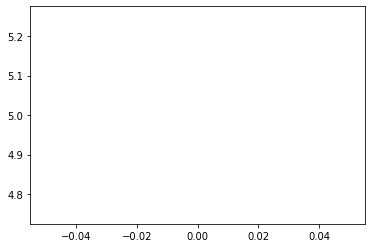

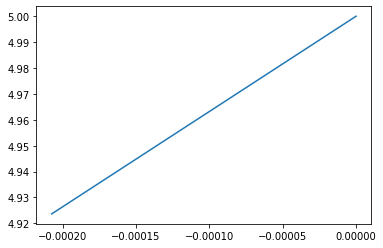

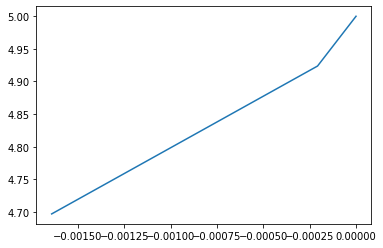

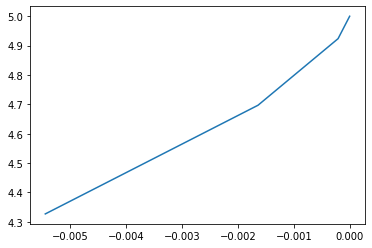

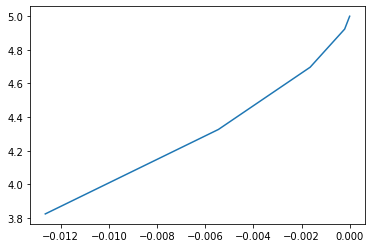

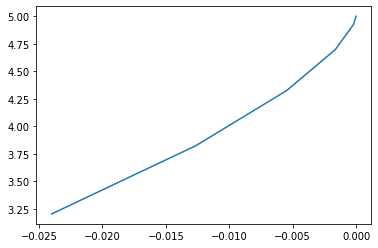

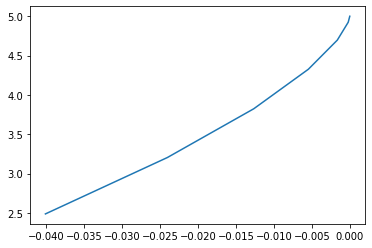

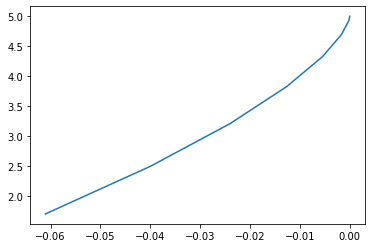

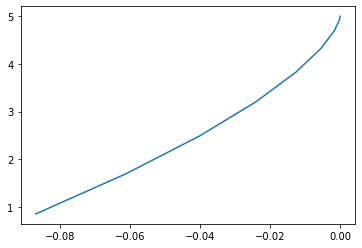

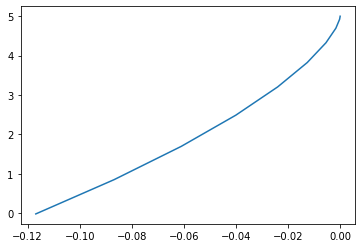

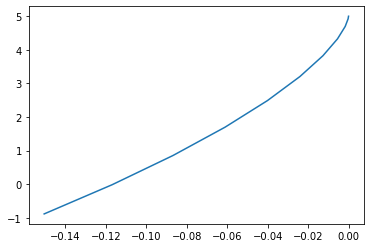

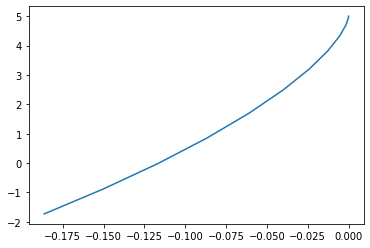

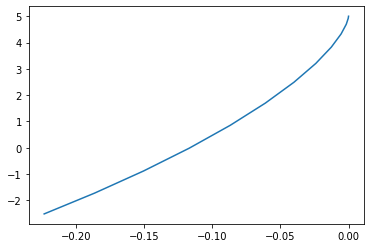

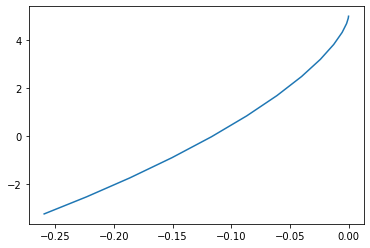

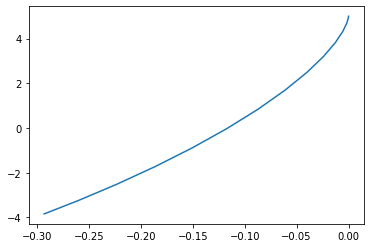

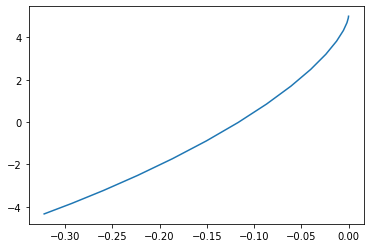

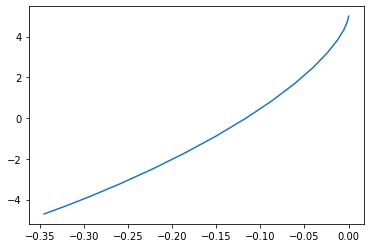

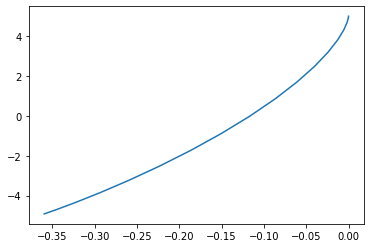

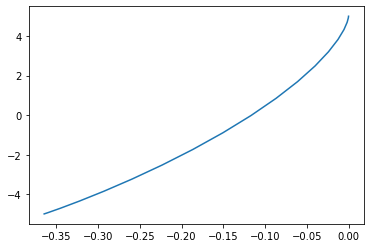

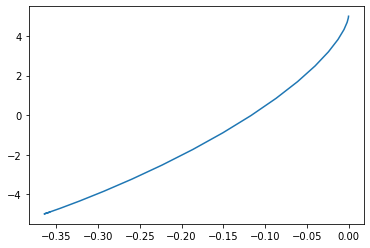

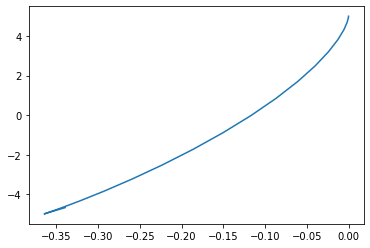

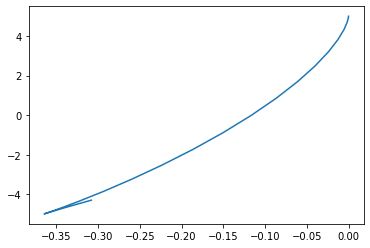

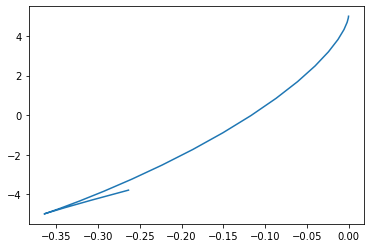

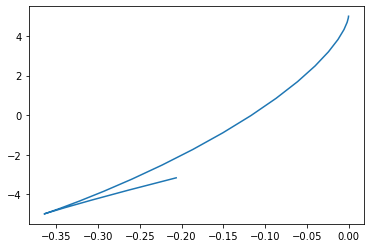

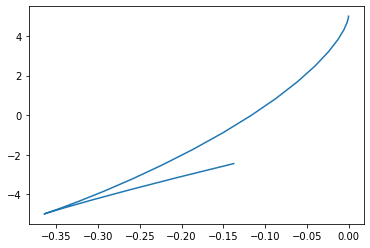

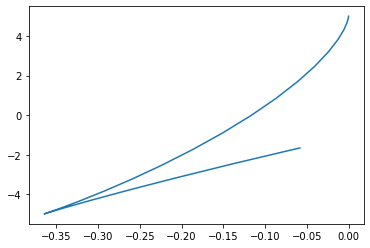

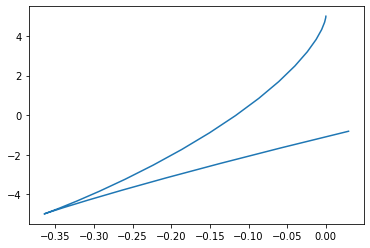

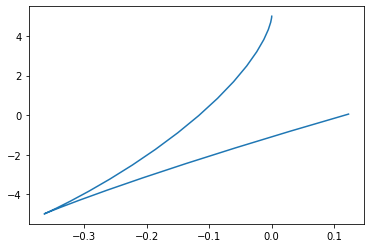

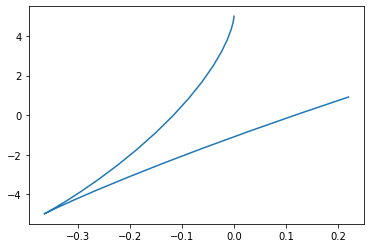

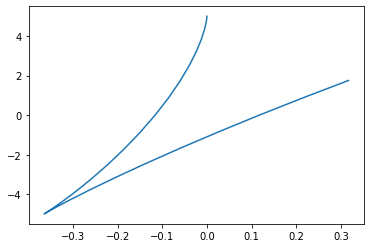

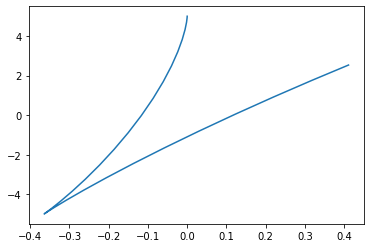

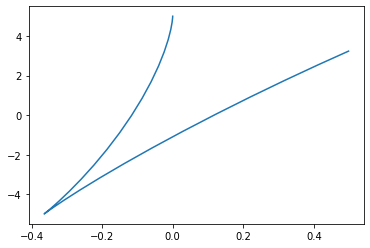

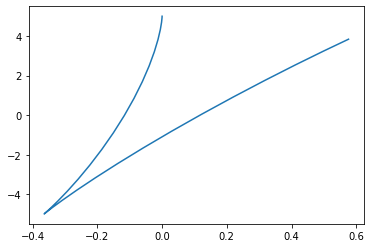

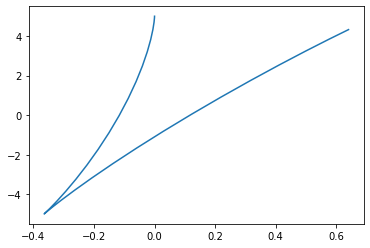

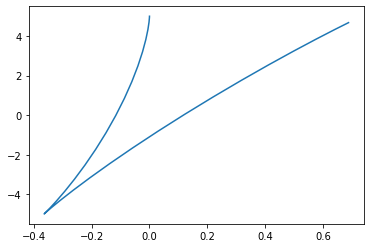

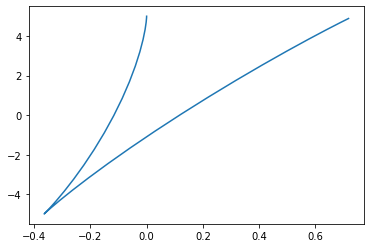

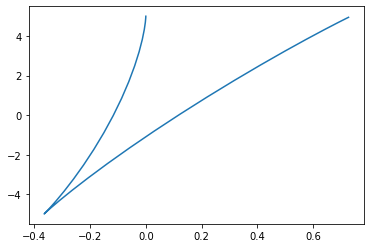

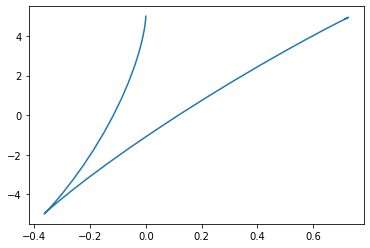

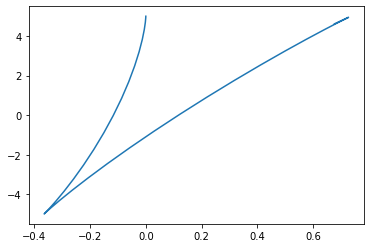

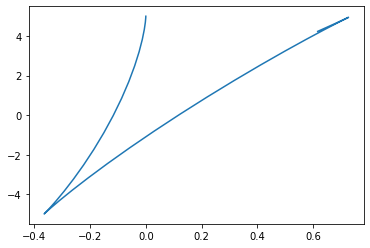

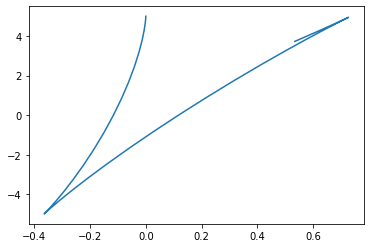

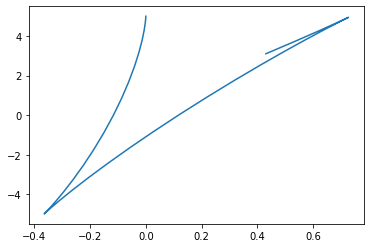

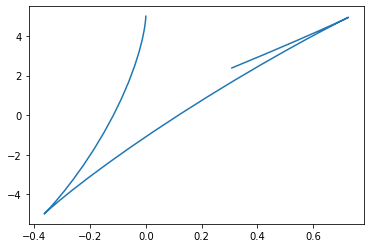

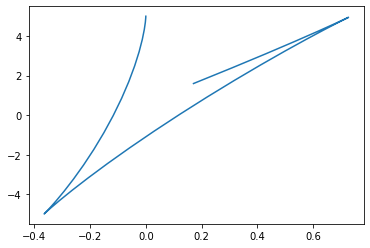

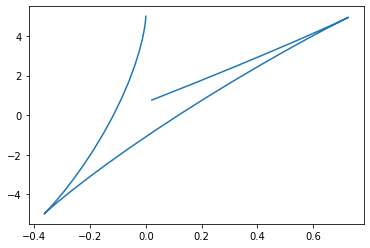

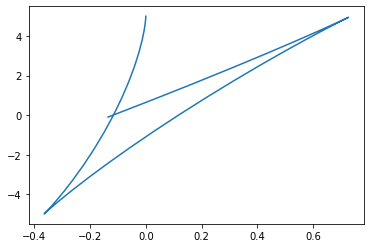

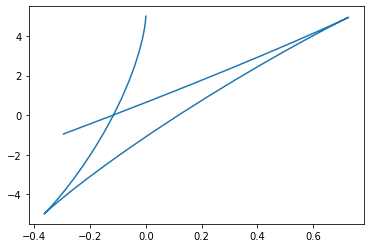

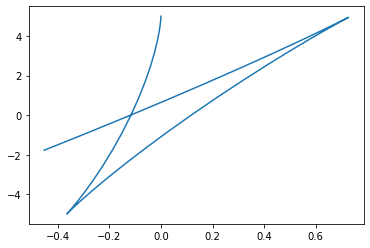

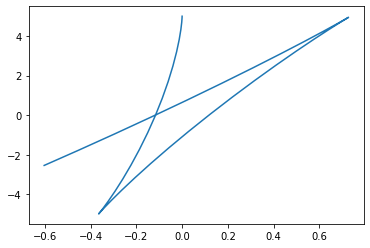

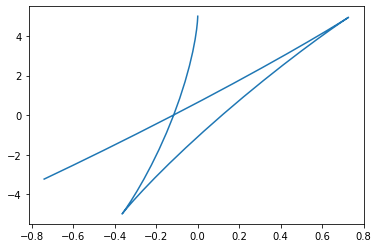

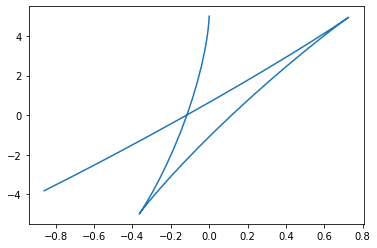

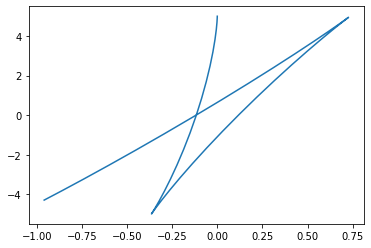

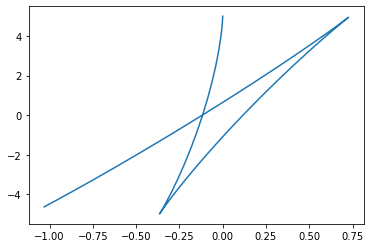

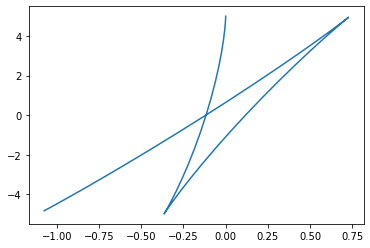

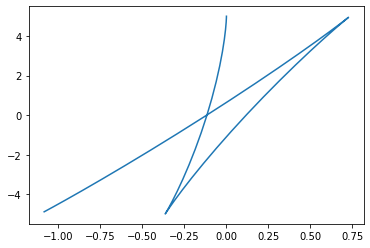

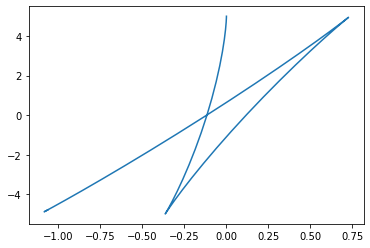

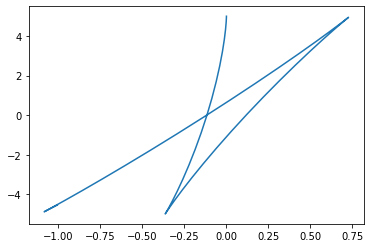

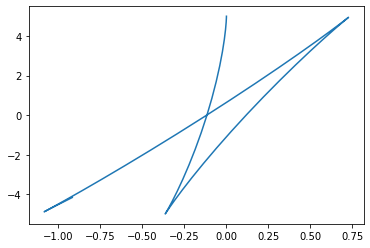

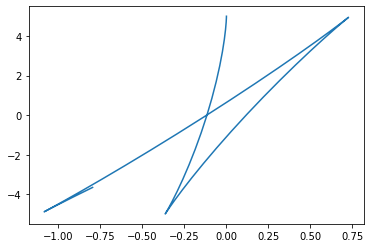

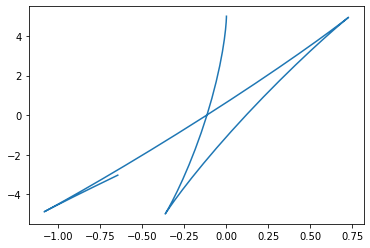

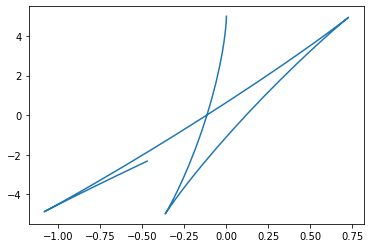

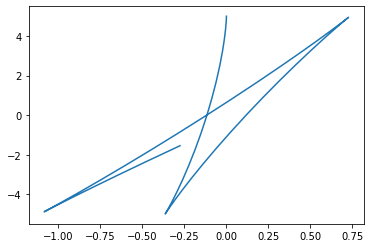

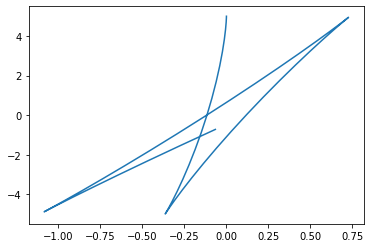

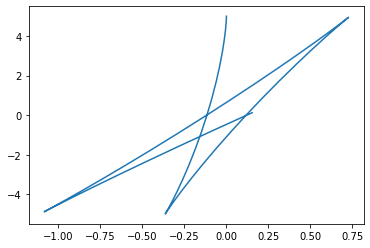

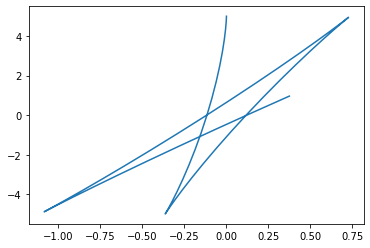

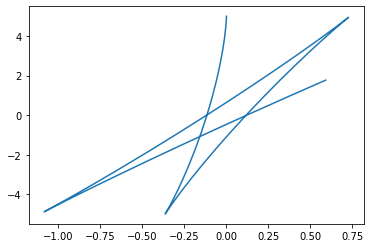

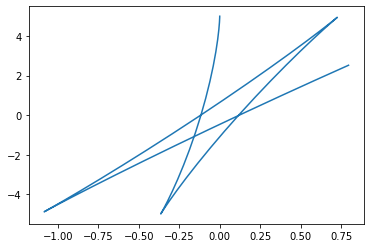

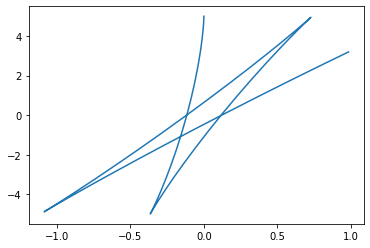

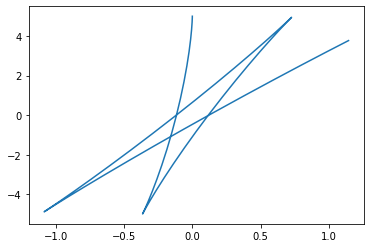

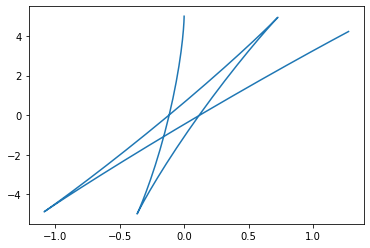

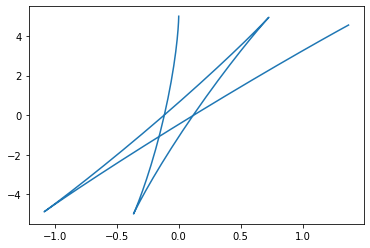

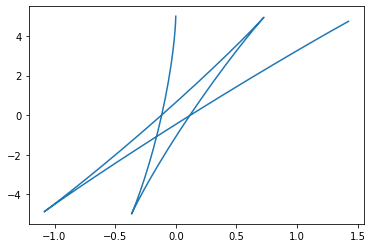

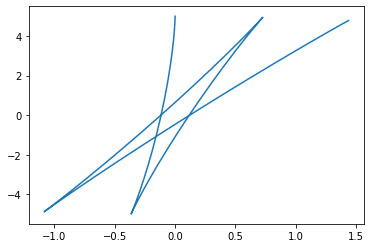

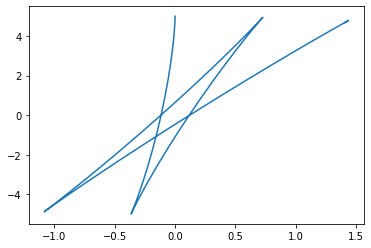

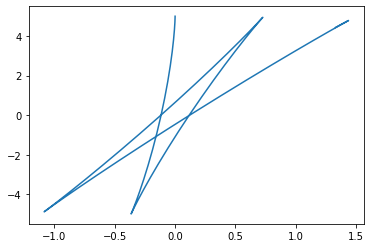

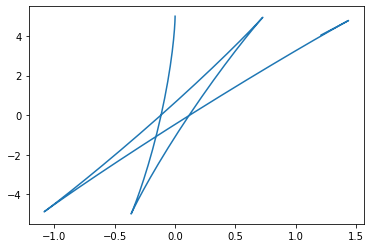

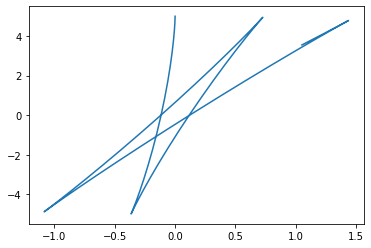

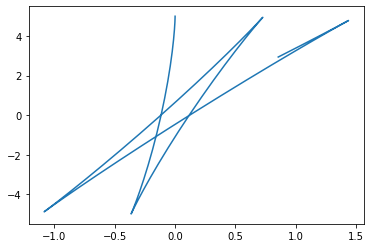

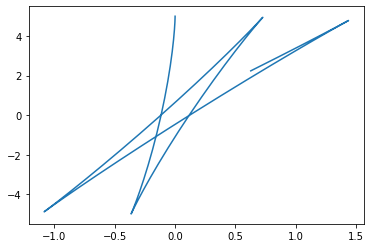

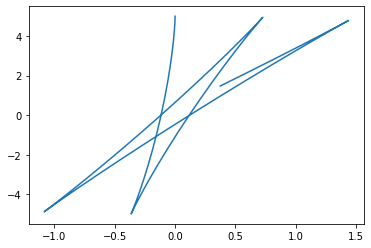

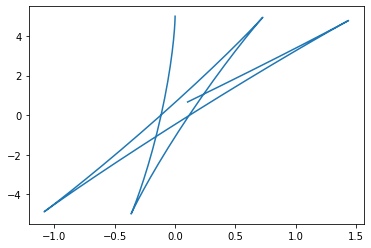

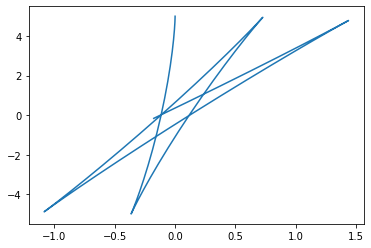

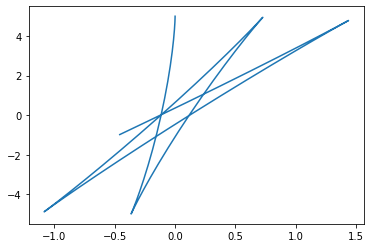

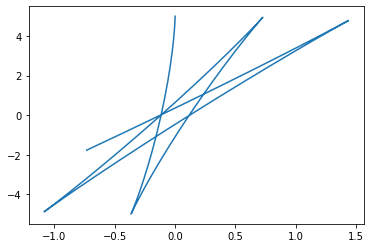

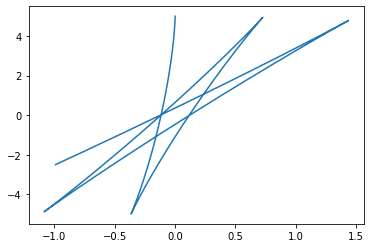

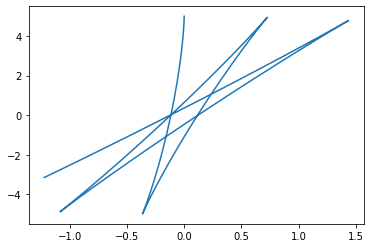

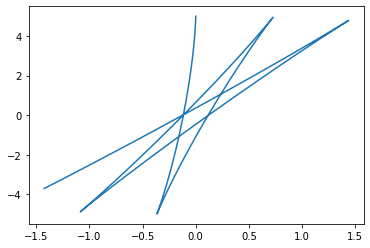

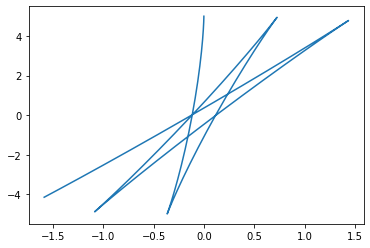

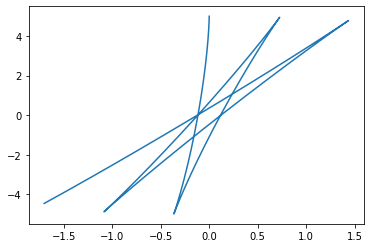

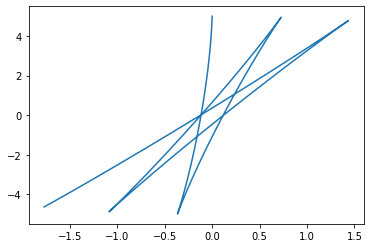

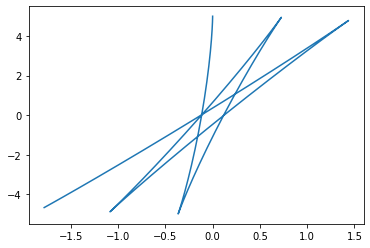

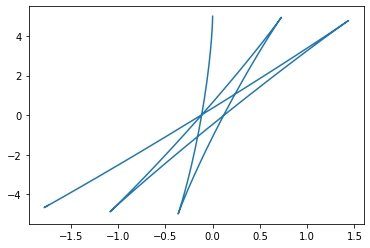

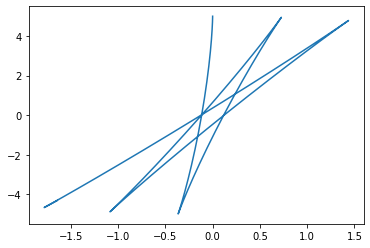

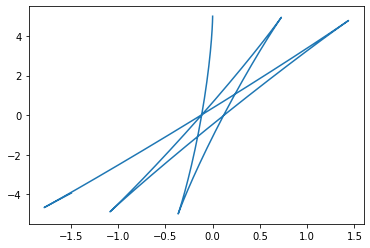

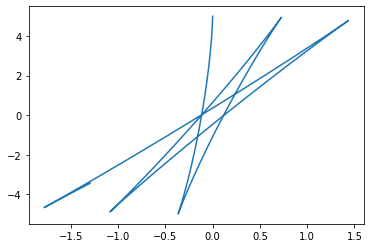

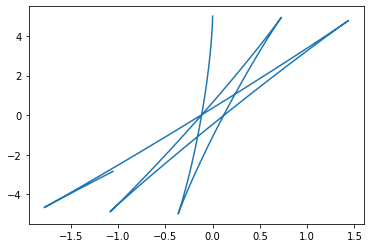

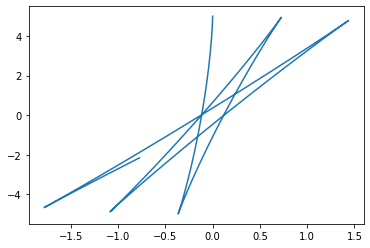

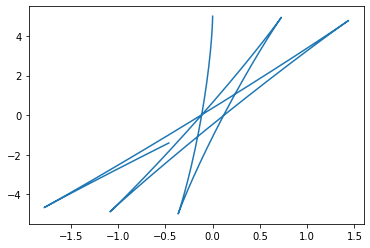

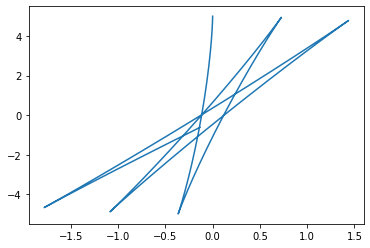

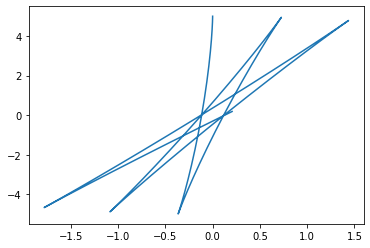

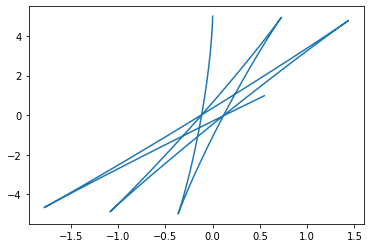

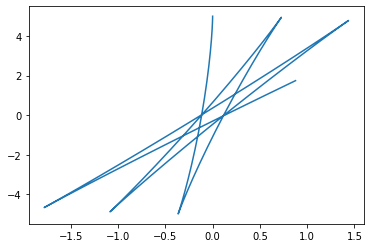

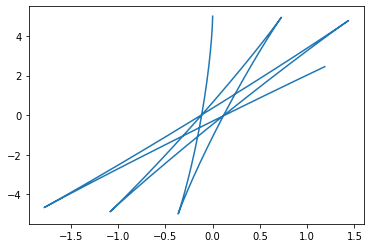

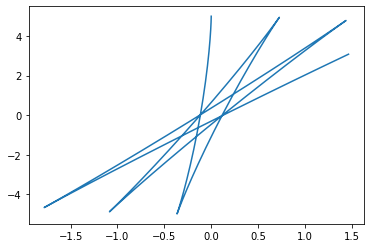

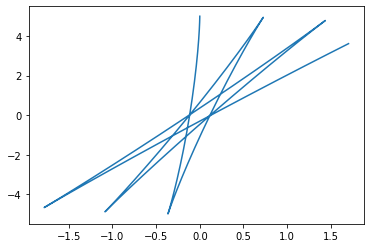

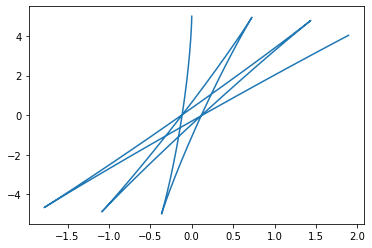

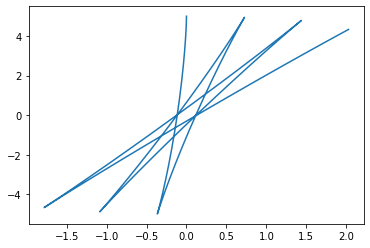

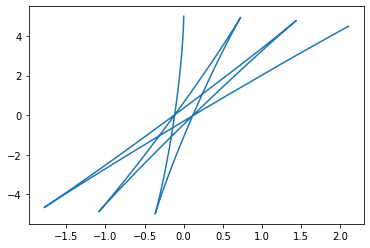

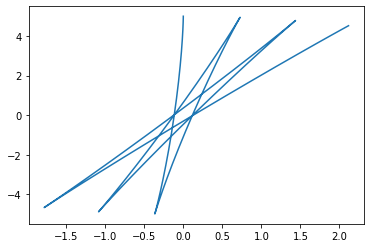

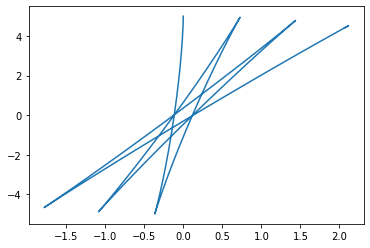

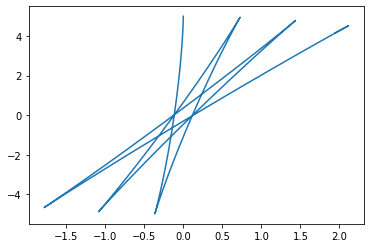

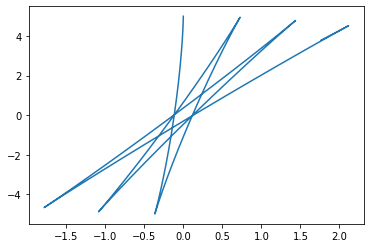

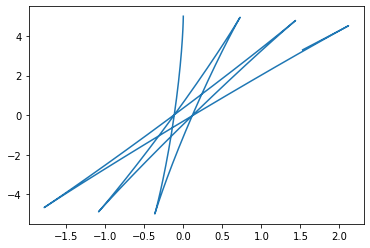

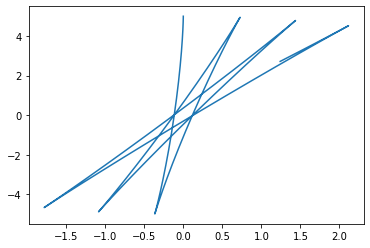

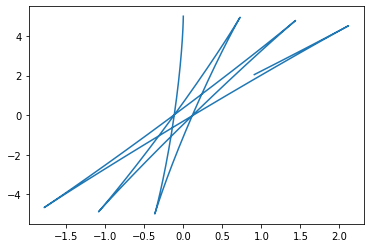

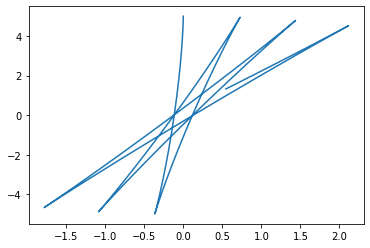

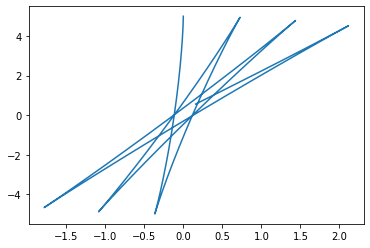

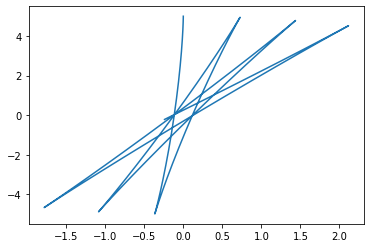

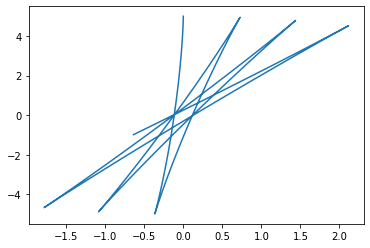

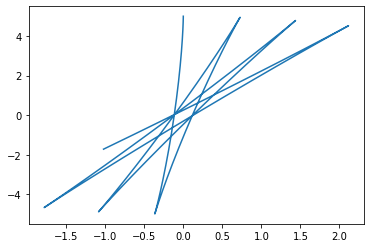

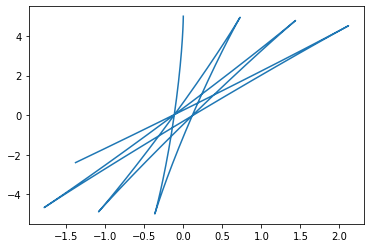

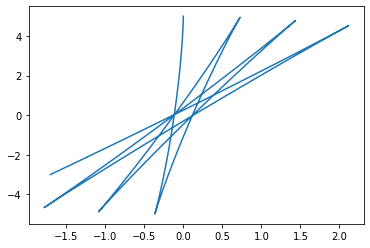

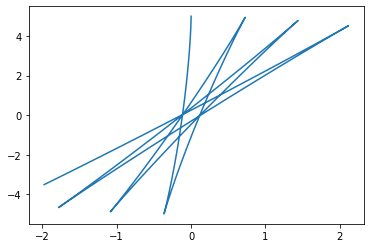

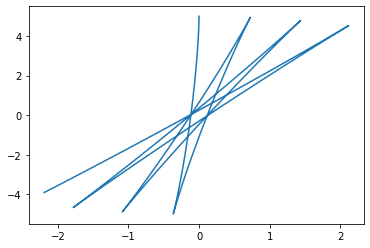

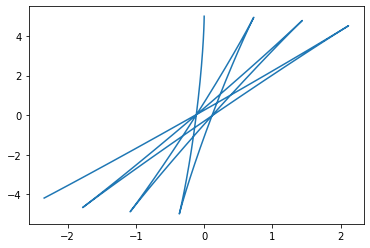

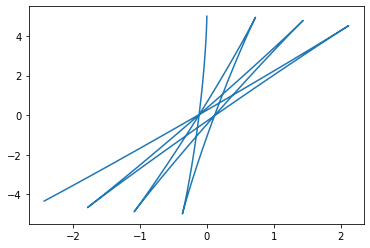

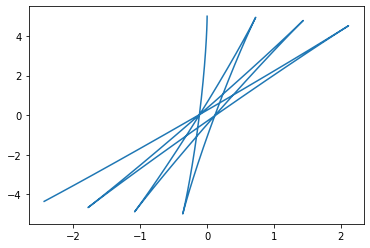

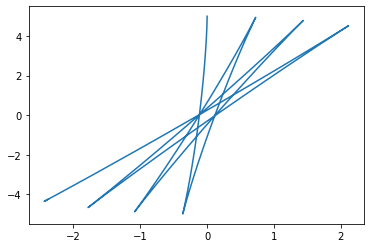

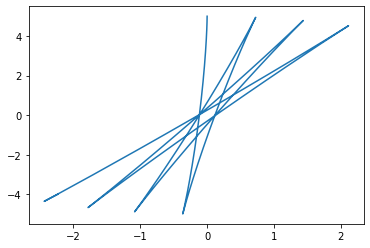

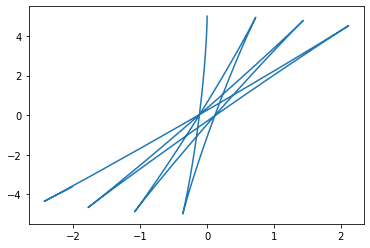

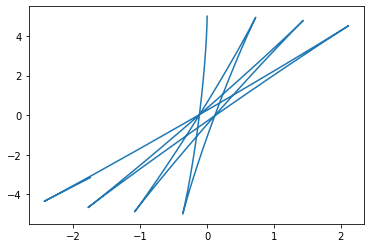

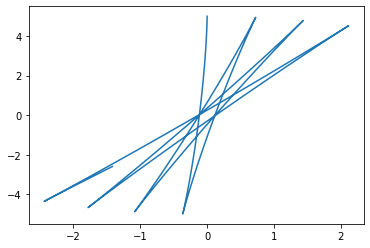

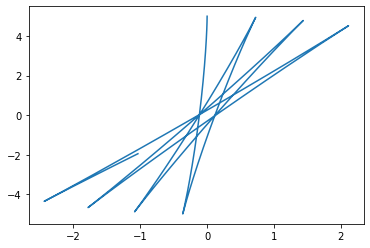

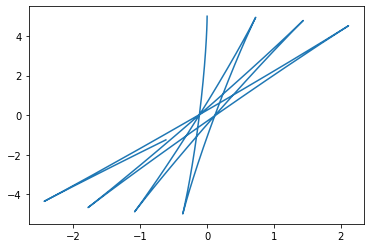

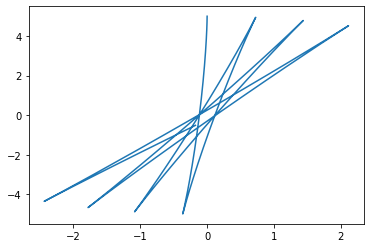

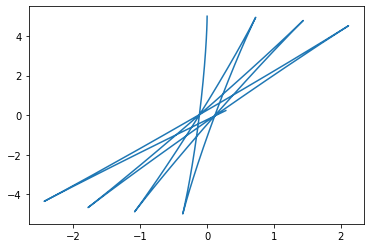

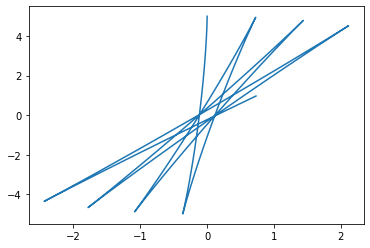

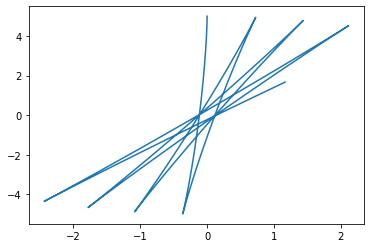

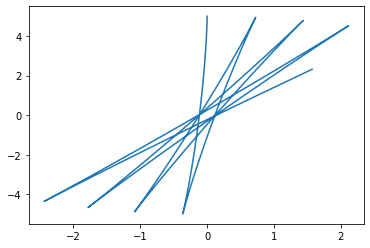

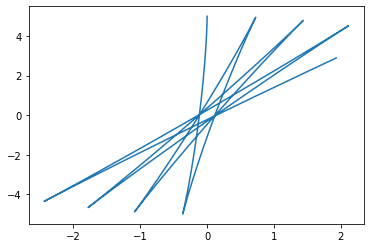

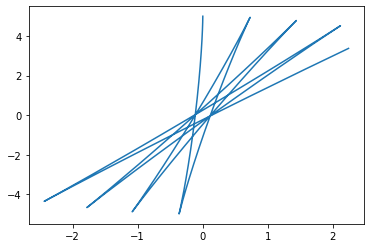

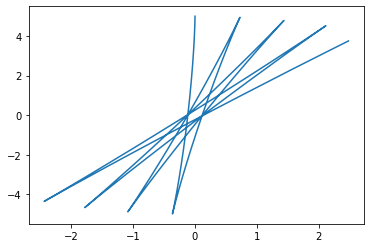

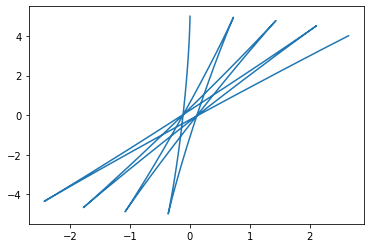

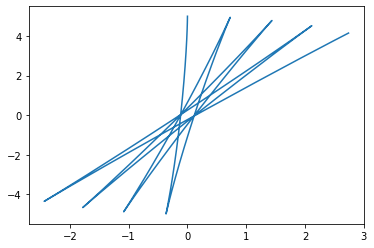

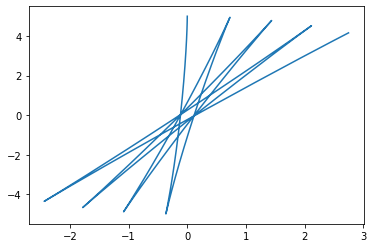

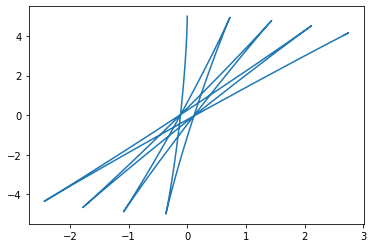

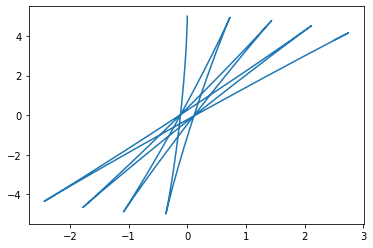

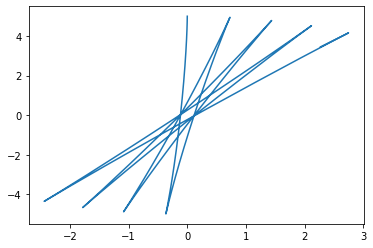

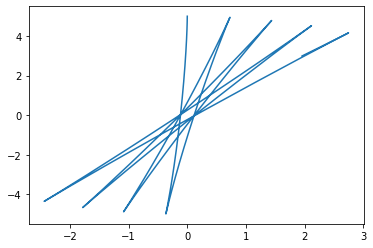

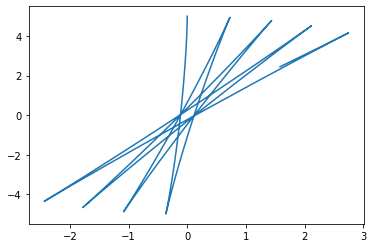

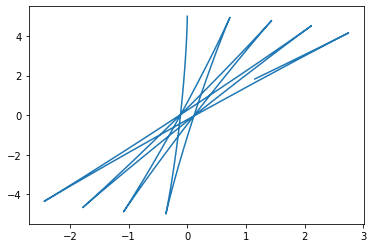

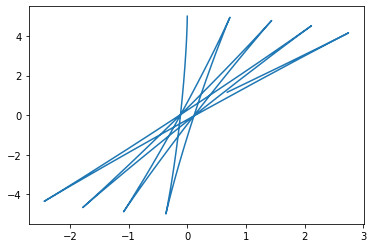

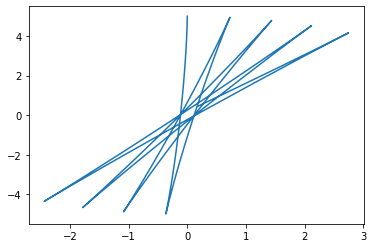

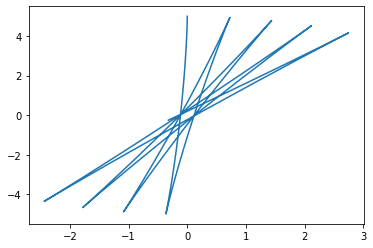

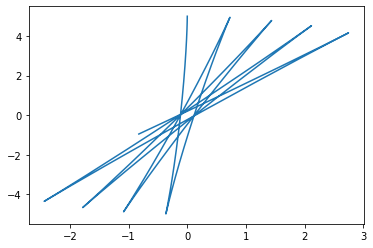

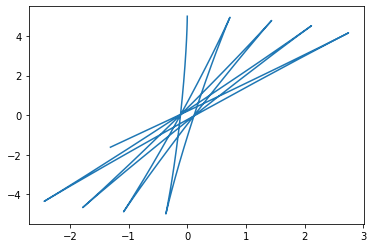

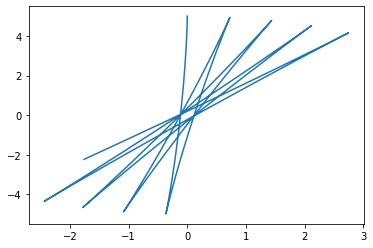

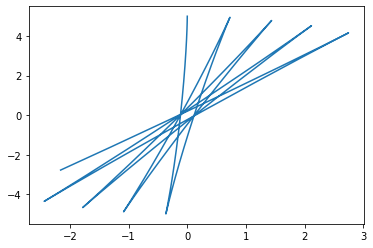

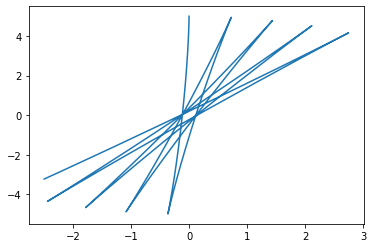

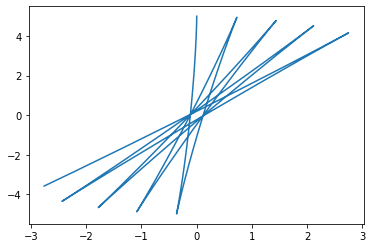

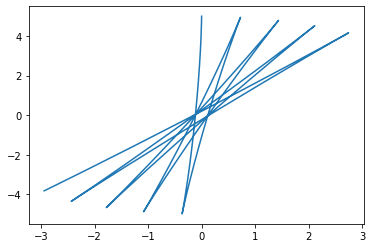

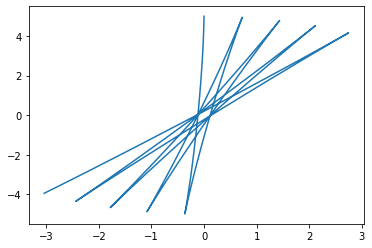

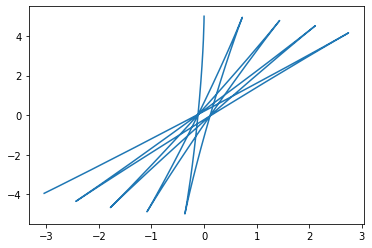

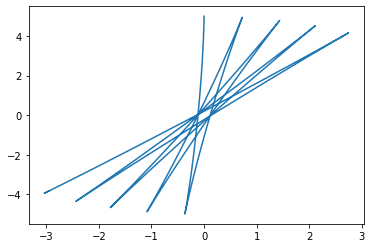

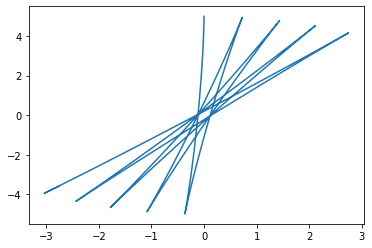

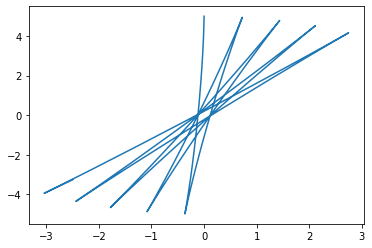

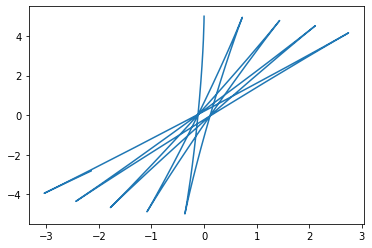

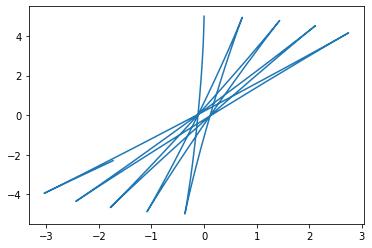

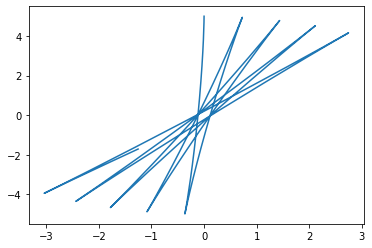

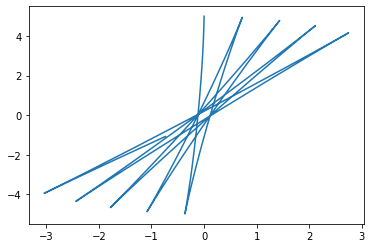

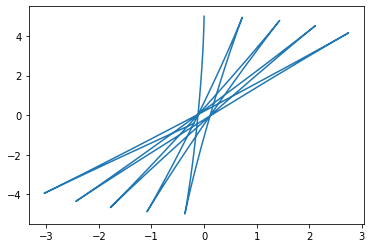

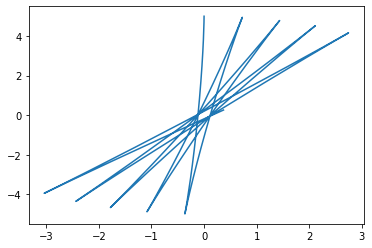

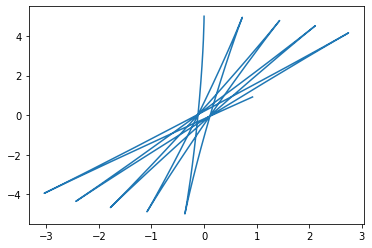

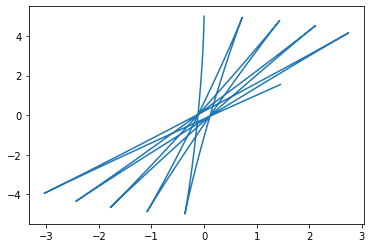

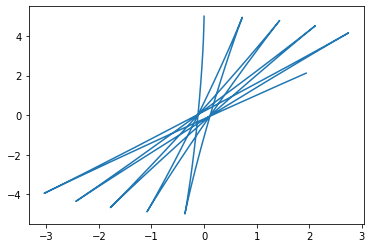

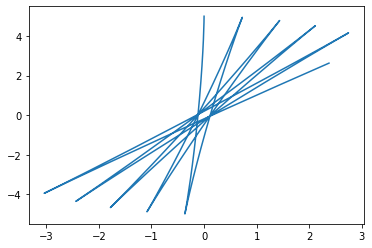

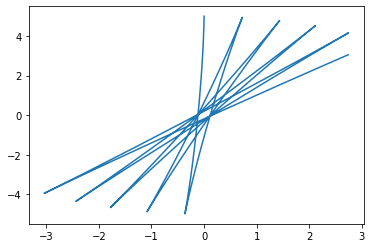

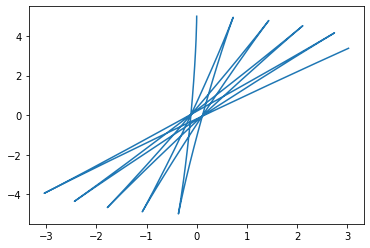

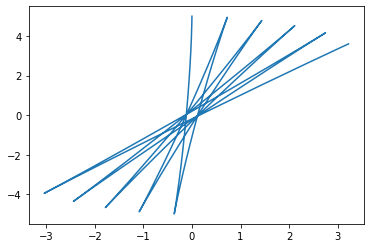

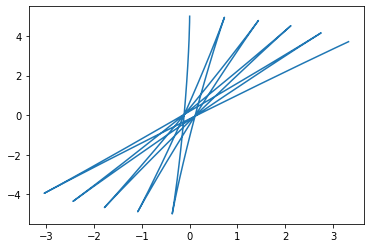

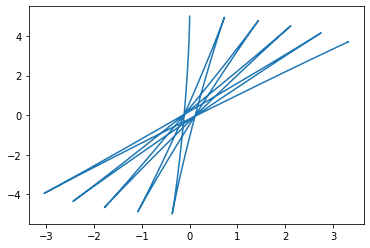

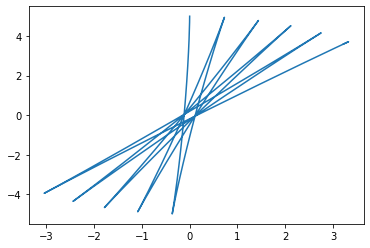

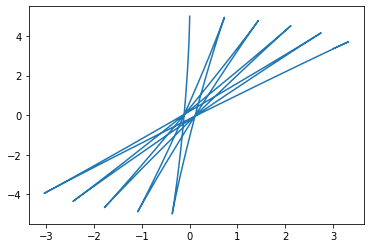

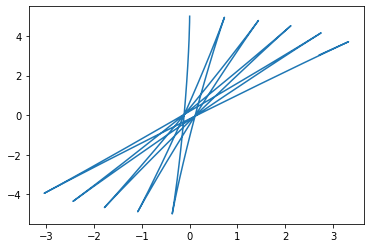

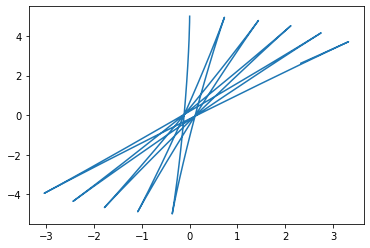

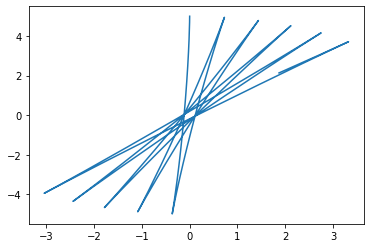

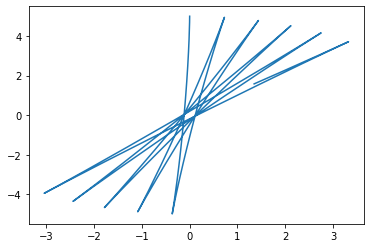

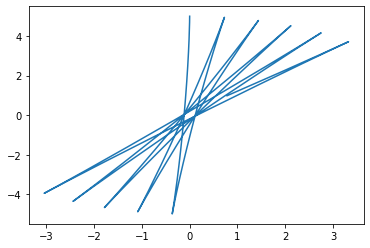

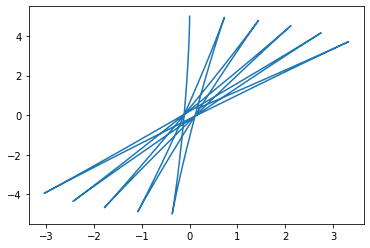

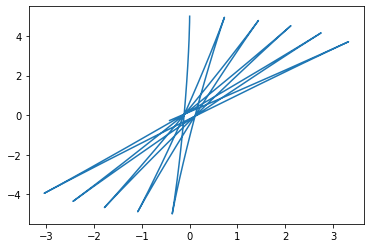

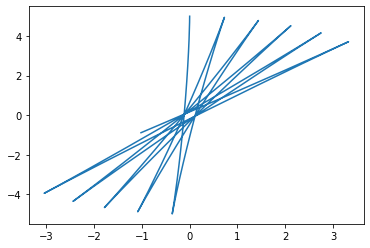

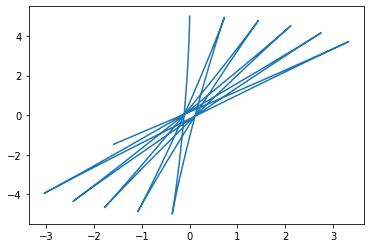

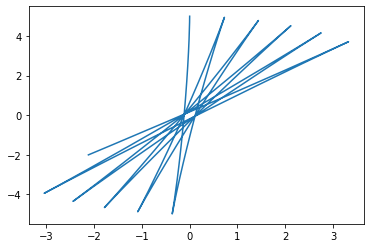

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def coupRK4_2D(f1,f2,pr1,pr2,x,y1,y2,dy1dx,dy2dx,dx,X):
    #f(pr,x,y1,y2,dy1dx,dy2dx)
    xx=[]
    yy1=[]
    ddy1dx=[]
    dd2y1dx2=[]
    yy2=[]
    ddy2dx=[]
    dd2y2dx2=[]
    
    while abs(x)<abs(X):
        xx.append(x) 
        l11=dx*dy1dx
        k11=dx*f1(pr1,x,y1,y2,dy1dx,dy2dx)
        l21=dx*dy2dx
        k21=dx*f2(pr2,x,y1,y2,dy1dx,dy2dx)
        l12=dx*(dy1dx+0.5*k11)
        k12=dx*f1(pr1,x+0.5*dx,y1+0.5*l11,y2+0.*l21,dy1dx+0.5*k11,dy2dx+0.5*k21)
        l22=dx*(dy2dx+0.5*k21)
        k22=dx*f2(pr2,x+0.5*dx,y1+0.5*l11,y2+0.5*l21,dy1dx+0.5*k11,dy2dx+0.5*k21)
        l13=dx*(dy1dx+0.5*k12)
        k13=dx*f1(pr1,x+0.5*dx,y1+0.5*l12,y2+0.5*l22,dy1dx+0.5*k12,dy2dx+0.5*k22)
        l23=dx*(dy2dx+0.5*k22)
        k23=dx*f2(pr2,x+0.5*dx,y1+0.5*l12,y2+0.5*l22,dy1dx+0.5*k12,dy2dx+0.5*k22)
        l14=dx*(dy1dx+k13)
        k14=dx*f1(pr1,x+dx,y1+l13,y2+l23,dy1dx+k13,dy2dx+k23)
        l24=dx*(dy2dx+k23)
        k24=dx*f2(pr2,x+dx,y1+l13,y2+l23,dy1dx+k13,dy2dx+k23)
        dy1=(1/6)*(l11+2*l12+2*l13+l14)
        dy1dx1=(1/6)*(k11+2*k12+2*k13+k14)
        d2y1dx2=dy1/dx
        yy1.append(y1)
        ddy1dx.append(dy1dx)
        dd2y1dx2.append(d2y1dx2)
        dy2=(1/6)*(l21+2*l22+2*l23+l24)
        dy2dx1=(1/6)*(k21+2*k22+2*k23+k24)
        d2y2dx2=dy2/dx
        yy2.append(y2)
        ddy2dx.append(dy2dx)
        dd2y2dx2.append(d2y2dx2)
        y1=y1+dy1
        dy1dx+=dy1dx1
        y2+=dy2
        dy2dx+=dy2dx1
        x+=dx
    return xx,[yy1,ddy1dx,dd2y1dx2],[yy2,ddy2dx,dd2y2dx2]
def f1(pr1,t,x,y,dxdt,dydt):
    omg,lam,g_l=pr1
    return 2*dydt*omg*np.sin(lam)-g_l*x
def f2(pr2,t,x,y,dxdt,dydt):
    omg,lam,g_l=pr2
    return -2*dxdt*omg*np.sin(lam)-g_l*y
def exc(pr,t,x0,y0):
    omg,lam,g_l=pr
    omg1=omg*np.sin(lam)
    omg2=(omg1**2+g_l)**0.5
    x=x0*np.cos(omg1*t)*np.cos(omg2*t)+y0*np.sin(omg1*t)*np.cos(omg2*t)
    y=-x0*np.sin(omg1*t)*np.cos(omg2*t)+y0*np.cos(omg1*t)*np.cos(omg2*t)
    return x,y
omg=7.27e-5
g=9.8
l=3.2e6
g_l=g/l
lam=34
lam=lam*np.pi*(1/180)
pr1=pr2=pr=[omg,lam,g_l]
x0=0
y0=5
t=0
x=x0
y=y0
dxdt=0
dydt=0
dt=100
T=86400
tt,[xx,ddy1dx,dd2y1dx2],[yy,ddy2dx,dd2y2dx2]=coupRK4_2D(f1,f2,pr1,pr2,t,x,y,dxdt,dydt,dt,T)
n=len(xx)
X=[]
Y=[]
for i in range(n):
    X.append(xx[i])
    Y.append(yy[i])
    plt.clf()
    plt.plot(X,Y)
    plt.pause(0.05)
plt.show()
    